In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [10]:
# Define paths to the training and testing directories
train_dir = 'train'
test_dir = 'test'

# Image dimensions
img_width, img_height = 48, 48

# Data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten and add Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 classes for 7 emotions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


D:\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=30
)


D:\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.2426 - loss: 1.8380

D:\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 196s 434ms/step - accuracy: 0.2426 - loss: 1.8379 - val_accuracy: 0.3016 - val_loss: 1.7151
Epoch 2/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - accuracy: 0.2656 - loss: 1.8125 - val_accuracy: 0.3000 - val_loss: 1.7193
Epoch 3/30


D:\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 66s 146ms/step - accuracy: 0.2943 - loss: 1.7323 - val_accuracy: 0.3933 - val_loss: 1.5621
Epoch 4/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 109us/step - accuracy: 0.3906 - loss: 1.5390 - val_accuracy: 0.3000 - val_loss: 1.5495
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 65s 146ms/step - accuracy: 0.3465 - loss: 1.6487 - val_accuracy: 0.4688 - val_loss: 1.4202
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 0.4375 - loss: 1.5038 - val_accuracy: 0.6000 - val_loss: 1.1954
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 66s 147ms/step - accuracy: 0.3978 - loss: 1.5405 - val_accuracy: 0.4912 - val_loss: 1.3373
Epoch 8/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.4375 - loss: 1.4910 - val_accuracy: 0.5000 - val_loss: 1.2978
Epoch 9/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 66s 146ms/step - accuracy: 0.4289 - loss: 1.4815 - val_accuracy: 0.4986 - val_loss: 1.3188
Epoch 10/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.5625 - loss: 1.3365 - val_acc

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.5638 - loss: 1.1594
Test Accuracy: 56.62%


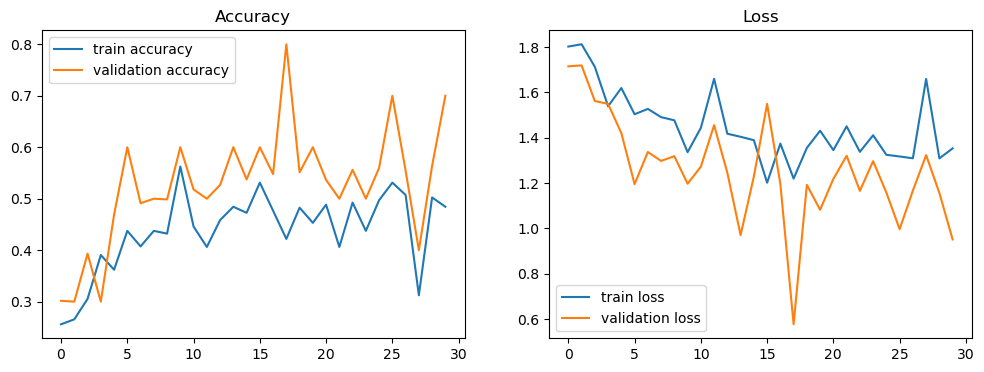

In [16]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.legend()
plt.show()


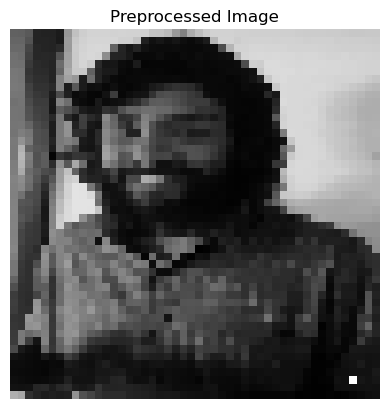

In [129]:
# Load the image using OpenCV (adjust the path to your image)
import cv2
import numpy as np
image_path = 'WhatsApp Image 2024-10-21 at 23.15.22_32d198a4.jpg'
image = cv2.imread(image_path)

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Suprise', 'Neutral']

# Convert the image to grayscale (as the model expects grayscale images)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to 48x48 pixels (the input size of the model)
resized_image = cv2.resize(gray_image, (48, 48))

# Normalize the pixel values (0-1)
normalized_image = resized_image / 255.0

# Expand dimensions to match the input shape: (1, 48, 48, 1)
input_image = np.expand_dims(normalized_image, axis=-1)  # Add channel dimension for grayscale
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

# Display the preprocessed image (optional)
plt.imshow(resized_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()


In [131]:
# Make a prediction using the model

prediction = model.predict(input_image)

# Get the index of the emotion with the highest probability
predicted_emotion_index = np.argmax(prediction)
predicted_emotion = emotion_labels[predicted_emotion_index]

# Display the predicted emotion
print(f'Predicted Emotion: {predicted_emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Emotion: Happy
